In [ ]:
import os

os.environ['TF_FORCE_GPU_ALLOW_GROWTH'] = 'true'
os.environ['TF_CPP_MIN_LOG_LEVEL'] = '2' #omit info
import numpy as np

from learnMSA.msa_hmm import Align, Configuration, Visualize
from learnMSA.msa_hmm.SequenceDataset import SequenceDataset

2025-10-27 14:41:22.943190: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:467] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
E0000 00:00:1761572482.959545 1801829 cuda_dnn.cc:8579] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
E0000 00:00:1761572482.964599 1801829 cuda_blas.cc:1407] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
W0000 00:00:1761572482.978267 1801829 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761572482.978284 1801829 computation_placer.cc:177] computation placer already registered. Please check linkage and avoid linking the same target more than once.
W0000 00:00:1761572482.978285 1801829 computation_placer.cc:177] computation placer alr

## learnMSA demo

In this notebook, we will fit a number of HMM models to a dataset of unaligned sequences. 
We will then use the fitted models to align the sequences and compare the results.
Moreover, we will visualize the best (according to an objective criterion) model and alignment.

*This notebook is meant to be a demo for running learnMSA in Python code. Check the readme if you want to run learnMSA from the command line.* 

Change the variables in the following cell to fit your needs.

In [ ]:
# Your fasta file to align.
train_filename = "../tests/data/egf.fasta"

# The number of independently trained models.
num_models = 10

# Use sequence weights based on a rapid pre-clustering of the sequences (requires mmseqs2 to be installed)
use_weights = True

# Align long insertions with an external aligner left unaligned by the main MSA stage (requires famsa to be installed).
align_insertions = True

## Run learnMSA from Python (Training + Viterbi alignment)

In [10]:
os.makedirs("tmp", exist_ok = True)

Training of 10 models on file egf.fasta
Configuration: 
{
num_models : 10
transitioner : ProfileHMMTransitioner(
 transition_init=
    {
    begin_to_match : DefaultEntry() , match_to_end : DefaultExit() , 
    match_to_match : DefaultMatchTransition(1) , match_to_insert : DefaultMatchTransition(-1) , 
    insert_to_match : Norm(0, 0.1) , insert_to_insert : Norm(-0.5, 0.1) , 
    match_to_delete : DefaultMatchTransition(-1) , delete_to_match : Norm(0, 0.1) , 
    delete_to_delete : Norm(-0.5, 0.1) , left_flank_loop : Norm(0, 0.1) , 
    left_flank_exit : Norm(-1, 0.1) , right_flank_loop : Norm(0, 0.1) , 
    right_flank_exit : Norm(-1, 0.1) , unannotated_segment_loop : Norm(0, 0.1) , 
    unannotated_segment_exit : Norm(-1, 0.1) , end_to_unannotated_segment : Norm(-9, 0.1) , 
    end_to_right_flank : Norm(0, 0.1) , end_to_terminal : Norm(0, 0.1)
    },
 flank_init=Const(0.0),
 prior=ProfileHMMTransitionPrior(match_comp=1, insert_comp=1, delete_comp=1, alpha_flank=7000, alpha_single=100

I0000 00:00:1761572565.989414 1801829 gpu_device.cc:2019] Created device /device:GPU:0 with 22148 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/10


I0000 00:00:1761572570.018775 1801829 gpu_device.cc:2019] Created device /device:GPU:0 with 22148 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1761572608.898168 1801986 cuda_solvers.cc:175] Creating GpuSolver handles for stream 0x6520e71f1a80


34/34 - 46s - 1s/step - aux_loss: 0.0000e+00 - loglik: -7.9995e+01 - loss: 84.8850 - prior: -4.8896e+00
Epoch 2/10
34/34 - 5s - 159ms/step - aux_loss: 0.0000e+00 - loglik: -6.1982e+01 - loss: 63.8466 - prior: -1.8645e+00
Epoch 3/10
34/34 - 5s - 159ms/step - aux_loss: 0.0000e+00 - loglik: -6.0912e+01 - loss: 62.6246 - prior: -1.7130e+00
Epoch 4/10
34/34 - 5s - 155ms/step - aux_loss: 0.0000e+00 - loglik: -6.0686e+01 - loss: 62.3629 - prior: -1.6765e+00
Epoch 5/10
34/34 - 5s - 159ms/step - aux_loss: 0.0000e+00 - loglik: -6.0585e+01 - loss: 62.2418 - prior: -1.6565e+00
Epoch 6/10
34/34 - 5s - 158ms/step - aux_loss: 0.0000e+00 - loglik: -6.0508e+01 - loss: 62.1576 - prior: -1.6494e+00
Epoch 7/10
34/34 - 5s - 158ms/step - aux_loss: 0.0000e+00 - loglik: -6.0434e+01 - loss: 62.0704 - prior: -1.6359e+00
Epoch 8/10
34/34 - 5s - 156ms/step - aux_loss: 0.0000e+00 - loglik: -6.0409e+01 - loss: 62.0351 - prior: -1.6260e+00
Epoch 9/10
34/34 - 5s - 155ms/step - aux_loss: 0.0000e+00 - loglik: -6.0378e+

I0000 00:00:1761572668.580328 1801829 gpu_device.cc:2019] Created device /device:GPU:0 with 22148 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


expansions model 0: [(12, 2), (13, 3), (18, 1), (19, 2)]
discards model 0: []
expansions model 1: [(12, 2), (13, 3), (18, 1), (19, 2)]
discards model 1: []
expansions model 2: [(12, 2), (14, 2), (17, 1)]
discards model 2: []
expansions model 3: [(10, 1), (11, 2), (12, 3), (13, 1), (16, 1), (17, 2)]
discards model 3: []
expansions model 4: [(12, 2), (13, 3), (14, 1), (17, 1), (18, 2)]
discards model 4: []
expansions model 5: [(12, 3), (13, 4), (16, 1), (17, 2)]
discards model 5: []
expansions model 6: [(12, 3), (13, 4), (14, 1), (15, 1), (16, 2)]
discards model 6: []
expansions model 7: [(12, 2), (13, 3), (14, 1), (17, 1), (18, 2)]
discards model 7: []
expansions model 8: [(12, 2), (13, 3), (14, 1), (17, 1), (19, 2)]
discards model 8: []
expansions model 9: [(12, 2), (13, 3), (14, 1), (17, 1), (18, 1)]
discards model 9: []
Re-initialized the encoder parameters.
Fitting models of lengths [34, 34, 33, 34, 34, 34, 34, 34, 34, 33] on 7774 sequences.
Batch size= 256 Learning rate= 0.1
Using 

I0000 00:00:1761572677.465173 1801829 gpu_device.cc:2019] Created device /device:GPU:0 with 22148 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


Epoch 1/10


I0000 00:00:1761572681.219251 1801829 gpu_device.cc:2019] Created device /device:GPU:0 with 22148 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


34/34 - 46s - 1s/step - aux_loss: 0.0000e+00 - loglik: -5.8581e+01 - loss: 63.5644 - prior: -4.9831e+00
Epoch 2/10
34/34 - 5s - 158ms/step - aux_loss: 0.0000e+00 - loglik: -5.7025e+01 - loss: 58.7549 - prior: -1.7302e+00
Epoch 3/10
34/34 - 5s - 156ms/step - aux_loss: 0.0000e+00 - loglik: -5.6913e+01 - loss: 58.4188 - prior: -1.5053e+00
Epoch 4/10
34/34 - 5s - 156ms/step - aux_loss: 0.0000e+00 - loglik: -5.6874e+01 - loss: 58.3333 - prior: -1.4596e+00
Epoch 5/10
34/34 - 5s - 159ms/step - aux_loss: 0.0000e+00 - loglik: -5.6846e+01 - loss: 58.2650 - prior: -1.4194e+00
Epoch 6/10
34/34 - 5s - 156ms/step - aux_loss: 0.0000e+00 - loglik: -5.6781e+01 - loss: 58.1660 - prior: -1.3853e+00
Epoch 7/10
34/34 - 5s - 157ms/step - aux_loss: 0.0000e+00 - loglik: -5.6808e+01 - loss: 58.1644 - prior: -1.3564e+00
Epoch 8/10
34/34 - 5s - 160ms/step - aux_loss: 0.0000e+00 - loglik: -5.6788e+01 - loss: 58.1182 - prior: -1.3301e+00
Epoch 9/10
34/34 - 5s - 156ms/step - aux_loss: 0.0000e+00 - loglik: -5.6742e+

I0000 00:00:1761572782.703691 1801829 gpu_device.cc:2019] Created device /device:GPU:0 with 22148 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


Aligning 1 insertion slices with famsa.
time for generating output: 4.5138
Wrote file tmp/interactive.alignment.fasta
31/31 ━━━━━━━━━━━━━━━━━━━━ 9s 192ms/step
>l=-56.41_t=0.01
............$CD.....P.....N............P.........CYN.H.G..T..CS......L.R....................-..........-A...T................G........YTCSCL..-PR......Y....T...GEH$.......................
>l=-55.25_t=0.01
............$CD.....S.....Q............P.........CRN.-.G..T..CSl.....N.T....................-..........-N...T................D........YTCACF..-PG......Y....T...GRY$.......................
>l=-46.82_t=0.00
............$CD.....S.....D............P.........CLN.G.G..T..CT......L.R....................-..........SL...D................S........YSCACA..-PG......Y....T...GQH$.......................
>l=-61.00_t=0.00
............$CD.....H.....V............T.........CLN.G.G..T..CQ......L.K....................-..........TL...E................D........YTCACA..-NG......Y....T...GER$.......................
>l=-61.75_t=0.00
....

I0000 00:00:1761572795.696354 1801829 gpu_device.cc:2019] Created device /device:GPU:0 with 22148 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1761572795.932292 1801829 gpu_device.cc:2019] Created device /device:GPU:0 with 22148 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6
I0000 00:00:1761572796.098601 1801829 gpu_device.cc:2019] Created device /device:GPU:0 with 22148 MB memory:  -> device: 0, name: NVIDIA GeForce RTX 3090, pci bus id: 0000:01:00.0, compute capability: 8.6


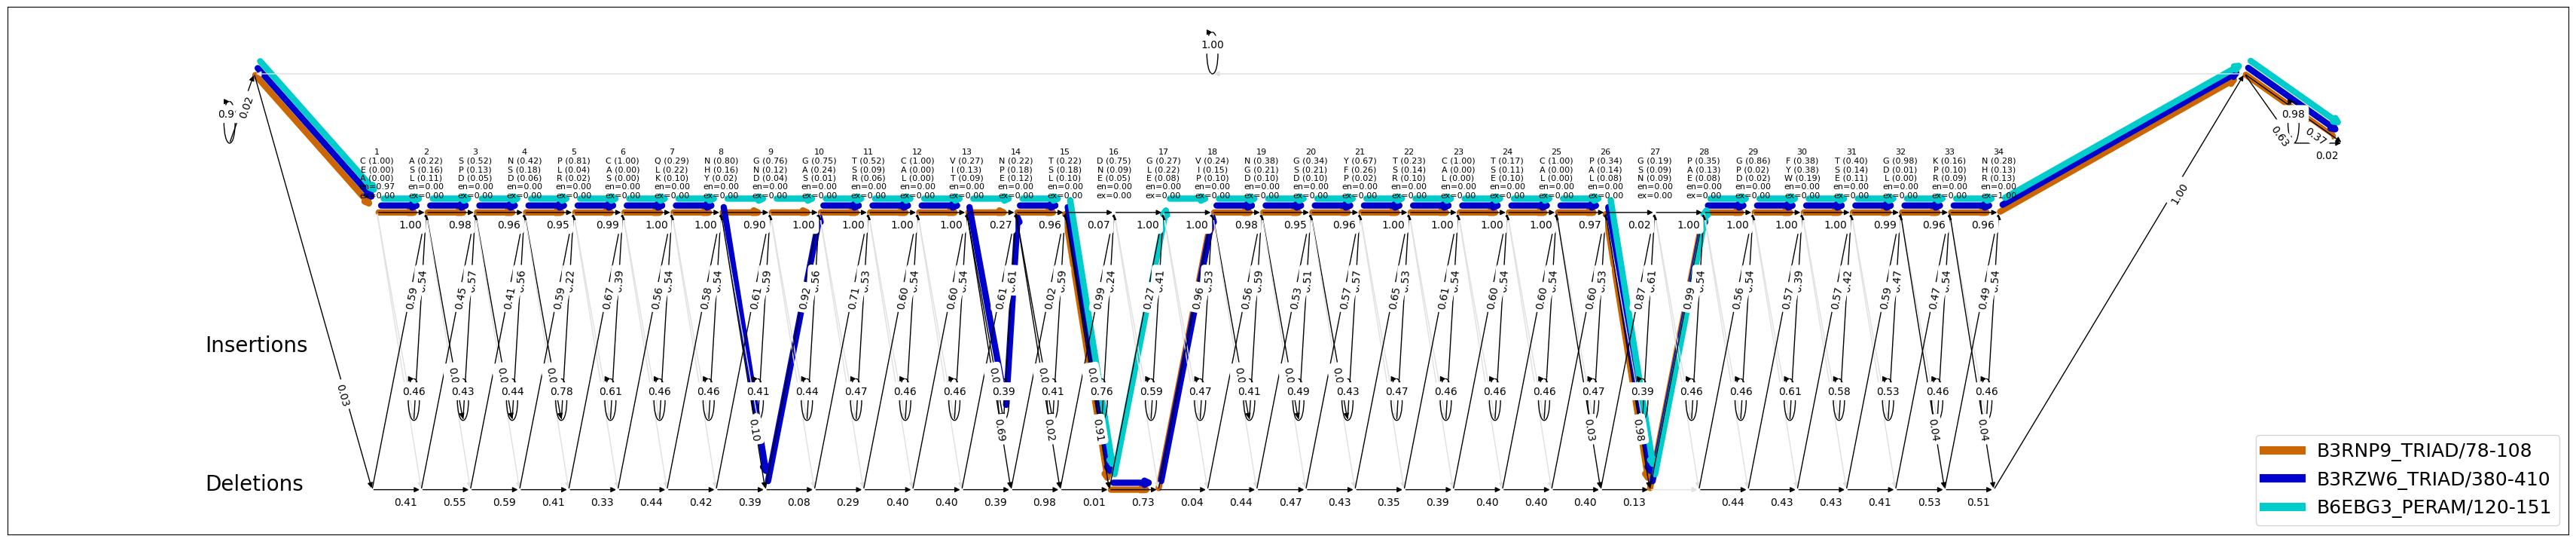

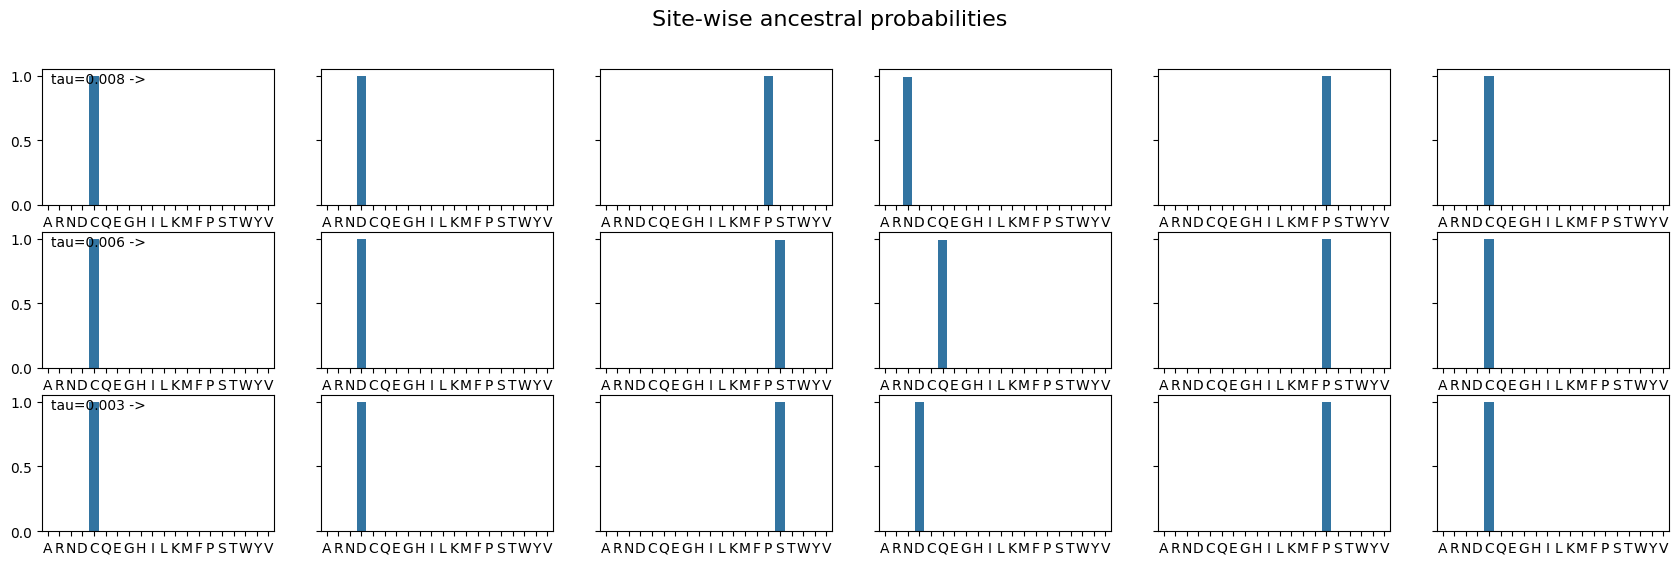

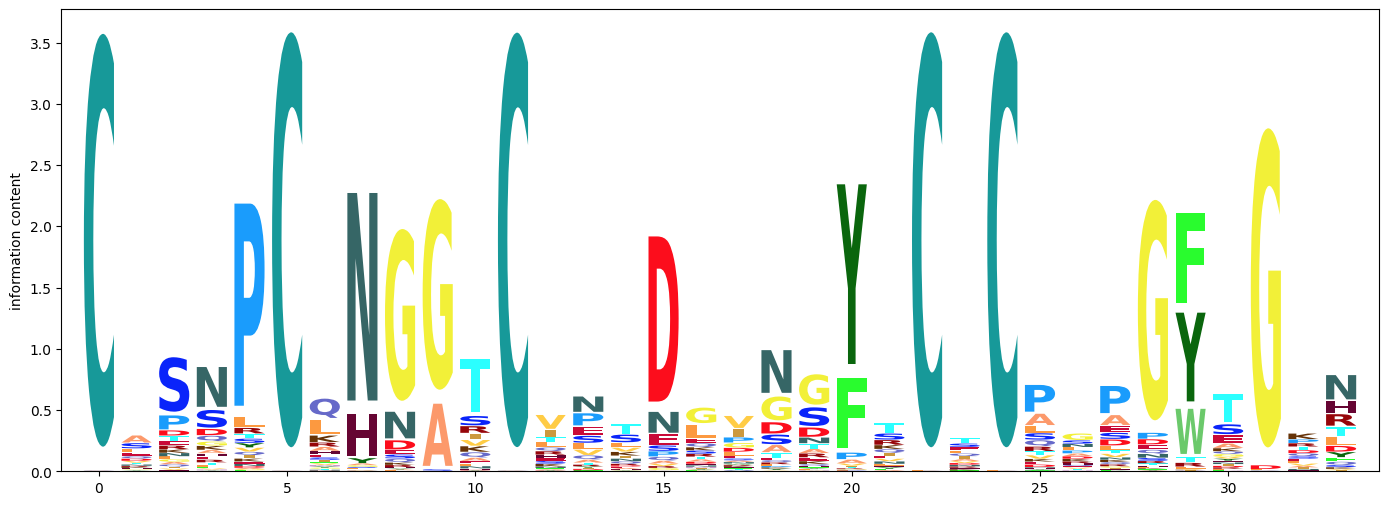

In [11]:
out_filename = "tmp/interactive.alignment.fasta"
config = Configuration.make_default(num_models)
with SequenceDataset(train_filename, fmt="fasta") as data:
    # Comment the next line out to disable cropping
    config["crop_long_seqs"] = int(np.ceil(2 * np.mean(data.seq_lens)))

    # Compute sequence weights
    if use_weights:
        sequence_weights = Align.compute_sequence_weights(
            train_filename, "tmp", config["cluster_seq_id"]
        )
    else:
        sequence_weights = None

    # Align and decode
    alignment_model = Align.run_learnMSA(
        data,
        out_filename,
        config,
        sequence_weights=sequence_weights,
        verbose=True,
        align_insertions=align_insertions,
    )

    # Visualize the results
    Visualize.print_and_plot(alignment_model, alignment_model.best_model)